In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

In [3]:
# read the data file

df = pd.ExcelFile('dataset.xlsx').parse('All'); 
dfcpy = df.copy()
dfcpy = dfcpy[['SARS-Cov-2 exam result',
               'Hemoglobin',
               'Leukocytes', 
               'Lymphocytes', 
               'Neutrophils', 
               'Basophils', 
               'Monocytes',
               'Urea', 
               'Potassium', 
               'Sodium', 
               'Magnesium',
               'Hb saturation (venous blood gas analysis)',
               'pH (venous blood gas analysis)',
               'pO2 (venous blood gas analysis)',
               'pCO2 (venous blood gas analysis)']]
dfcpy.shape

(5644, 15)

In [4]:
dfcpy.describe()

,Hemoglobin,Leukocytes,Lymphocytes,Neutrophils,Basophils,Monocytes,Urea,Potassium,Sodium,Magnesium,Hb saturation (venous blood gas analysis),pH (venous blood gas analysis),pO2 (venous blood gas analysis),pCO2 (venous blood gas analysis)
count,6.030000e+02,6.020000e+02,6.020000e+02,5.130000e+02,6.020000e+02,6.010000e+02,3.970000e+02,3.710000e+02,3.700000e+02,4.000000e+01,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02
mean,-1.601319e-08,6.215833e-09,-7.866736e-09,5.908361e-09,-6.633740e-09,-3.220114e-09,-6.675260e-09,2.038366e-08,1.123628e-08,-5.215406e-09,1.509290e-08,3.593467e-09,-7.909394e-09,-1.935234e-08
std,1.000830e+00,1.000832e+00,1.000832e+00,1.000976e+00,1.000832e+00,1.000833e+00,1.001262e+00,1.001350e+00,1.001354e+00,1.012739e+00,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00
min,-4.345603e+00,-2.020303e+00,-1.865070e+00,-3.339775e+00,-1.140144e+00,-2.163721e+00,-1.630410e+00,-2.283079e+00,-5.246946e+00,-2.191136e+00,-2.295574e+00,-4.772944e+00,-1.633925e+00,-2.705014e+00
25%,-5.862439e-01,-6.372547e-01,-7.307069e-01,-6.518655e-01,-5.292256e-01,-6.141920e-01,-5.883426e-01,-8.001102e-01,-5.750077e-01,-5.579909e-01,-8.025806e-01,-5.255692e-01,-6.942536e-01,-5.466186e-01
50%,4.031596e-02,-2.128790e-01,-1.426696e-02,-5.364196e-02,-2.237665e-01,-1.151911e-01,-1.417422e-01,-5.862590e-02,1.437519e-01,-1.360926e-02,9.036924e-02,-9.088095e-02,-2.126297e-01,1.373409e-02
75%,7.295320e-01,4.542955e-01,5.976919e-01,6.838943e-01,3.871516e-01,4.888627e-01,4.537250e-01,6.828590e-01,5.031317e-01,5.307717e-01,8.172991e-01,4.904491e-01,4.828621e-01,6.190532e-01
max,2.671868e+00,4.522042e+00,3.764100e+00,2.535929e+00,1.107822e+01,4.533397e+00,1.124657e+01,3.401635e+00,4.096930e+00,2.163916e+00,1.707877e+00,2.789583e+00,3.775081e+00,5.679521e+00


In [5]:
df_positive = dfcpy[dfcpy['SARS-Cov-2 exam result'] == 'positive']
df_positive = df_positive[['Hemoglobin','Leukocytes', 
               'Lymphocytes', 'Neutrophils', 'Basophils', 'Monocytes',
               'Urea', 'Potassium', 'Sodium', 'Magnesium','Hb saturation (venous blood gas analysis)',
               'pH (venous blood gas analysis)', 'pO2 (venous blood gas analysis)',
               'pCO2 (venous blood gas analysis)']]
df_positive = df_positive.dropna()
df_positive.head()

,Hemoglobin,Leukocytes,Lymphocytes,Neutrophils,Basophils,Monocytes,Urea,Potassium,Sodium,Magnesium,Hb saturation (venous blood gas analysis),pH (venous blood gas analysis),pO2 (venous blood gas analysis),pCO2 (venous blood gas analysis)
4863,-1.463427,-0.773612,-0.568655,0.528192,-0.529226,-0.220244,-1.407110,-0.800110,0.503132,1.619535,1.674674,1.050830,2.899401,-0.615798
5017,-0.147652,0.314460,-1.694489,1.814783,-1.140144,-1.270772,-0.439476,-1.294433,1.581271,-1.102373,-1.522395,-0.666974,-1.135461,0.518743
5226,-0.210308,-1.271731,-0.031325,0.143034,-0.223767,0.357547,-0.439476,0.682859,-0.934388,-1.102373,0.436639,0.275724,0.130906,0.532579


In [6]:
df_negative = dfcpy[dfcpy['SARS-Cov-2 exam result'] == 'negative']
df_negative = df_negative[['Hemoglobin','Leukocytes', 
               'Lymphocytes', 'Neutrophils', 'Basophils', 'Monocytes',
               'Urea', 'Potassium', 'Sodium', 'Magnesium', 'Hb saturation (venous blood gas analysis)',
               'pH (venous blood gas analysis)','pO2 (venous blood gas analysis)',
               'pCO2 (venous blood gas analysis)']]
df_negative = df_negative.dropna()
df_negative.head()

,Hemoglobin,Leukocytes,Lymphocytes,Neutrophils,Basophils,Monocytes,Urea,Potassium,Sodium,Magnesium,Hb saturation (venous blood gas analysis),pH (venous blood gas analysis),pO2 (venous blood gas analysis),pCO2 (venous blood gas analysis)
8,-0.774212,0.364550,-0.005738,-0.127395,-0.223767,0.068652,-0.067309,0.930020,0.503132,1.075153,-0.554737,-0.855513,-0.562902,0.615594
928,-0.147652,0.701268,-0.406603,0.388879,0.081693,-0.115191,-0.067309,1.424343,-0.934388,0.530772,0.223185,1.323165,-0.354086,-0.352916
3180,-0.398276,1.722553,-0.662474,0.995298,-0.529226,-0.351560,1.421359,0.930020,-0.575008,-0.557991,1.162383,1.846886,0.831450,-1.293755
4355,-0.962180,-1.088067,2.467685,-2.217081,0.387152,0.121178,-0.290609,-1.294433,0.143752,-0.013609,-0.293848,-0.080407,-0.522486,-0.048527
4926,-3.593731,0.125230,-0.943933,0.438049,-0.529226,-0.482876,4.473129,-1.294433,3.737550,0.530772,0.797140,0.401417,0.413818,0.698609


In [7]:
#standardization
scaler = StandardScaler()
std_data = scaler.fit_transform(df_negative.values)
std_df_negative = pd.DataFrame(std_data, index=df_negative.index, columns=df_negative.columns)
std_df_negative.head()

,Hemoglobin,Leukocytes,Lymphocytes,Neutrophils,Basophils,Monocytes,Urea,Potassium,Sodium,Magnesium,Hb saturation (venous blood gas analysis),pH (venous blood gas analysis),pO2 (venous blood gas analysis),pCO2 (venous blood gas analysis)
8,0.323694,-0.152329,0.373166,-0.452965,0.112509,0.253971,-0.481301,0.790222,0.254660,1.452600,-1.122856,-1.316724,-0.942081,0.924982
928,0.971082,0.285481,-0.006462,0.058447,0.675053,0.023088,-0.481301,1.157767,-0.877163,0.760886,-0.113824,1.020124,-0.647977,-0.344601
3180,0.712127,1.613384,-0.248778,0.659153,-0.450035,-0.273760,0.521410,0.790222,-0.594207,-0.622543,1.104398,1.581867,1.021773,-1.577911
4355,0.129477,-2.041063,2.715553,-2.522967,1.237597,0.319937,-0.631708,-0.863731,-0.028296,0.069172,-0.784461,-0.485345,-0.885157,0.054411
4926,-2.589553,-0.463500,-0.515325,0.107153,-0.450035,-0.438676,2.576967,-0.863731,2.801264,0.760886,0.630645,0.031458,0.433566,1.033803


In [8]:
#standardization
scaler = StandardScaler()
std_data_pos= scaler.fit_transform(df_positive.values)
std_df_positive = pd.DataFrame(std_data_pos, index=df_positive.index, columns=df_positive.columns)
std_df_positive.head()

,Hemoglobin,Leukocytes,Lymphocytes,Neutrophils,Basophils,Monocytes,Urea,Potassium,Sodium,Magnesium,Hb saturation (venous blood gas analysis),pH (venous blood gas analysis),pO2 (venous blood gas analysis),pCO2 (venous blood gas analysis)
4863,-1.412953,-0.296911,0.283068,-0.420368,0.267261,0.233786,-1.414214,-0.392232,0.116248,1.414214,1.123196,1.183041,1.345990,-1.414136
5017,0.758170,1.345904,-1.341494,1.379572,-1.336306,-1.324787,0.707107,-0.980581,1.162476,-0.707107,-1.305791,-1.262573,-1.048806,0.694212
5226,0.654784,-1.048993,1.058426,-0.959204,1.069045,1.091001,0.707107,1.372813,-1.278724,-0.707107,0.182595,0.079532,-0.297184,0.719924


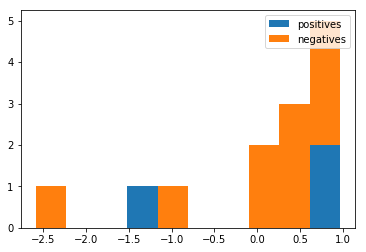

In [36]:
#Hemoglobin
positives = std_df_positive['Hemoglobin']
negatives = std_df_negative['Hemoglobin']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

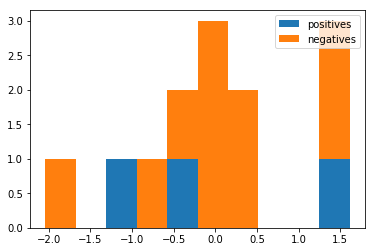

In [35]:
#Leukocytes
positives = std_df_positive['Leukocytes']
negatives = std_df_negative['Leukocytes']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

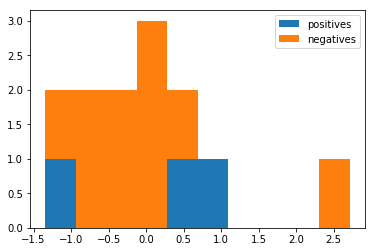

In [34]:
#Lymphocytes
positives = std_df_positive['Lymphocytes']
negatives = std_df_negative['Lymphocytes']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

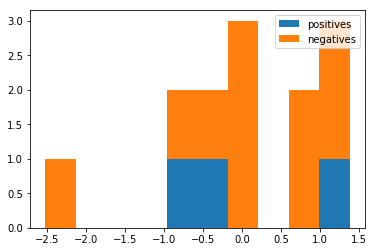

In [33]:
#Neutrophils
positives = std_df_positive['Neutrophils']
negatives = std_df_negative['Neutrophils']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

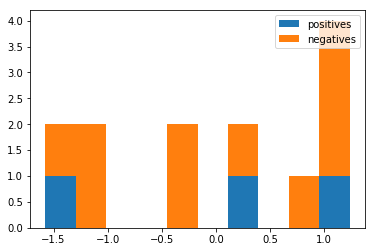

In [32]:
#Basophils
positives = std_df_positive['Basophils']
negatives = std_df_negative['Basophils']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

In [14]:
df_negative = df_negative[['Hemoglobin','Leukocytes', 
               'Lymphocytes', 'Neutrophils', 'Basophils', 'Monocytes',
               'Urea', 'Potassium', 'Sodium', 'Hb saturation (venous blood gas analysis)']]

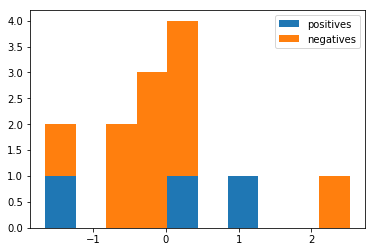

In [31]:
#Monocytes
positives = std_df_positive['Monocytes']
negatives = std_df_negative['Monocytes']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

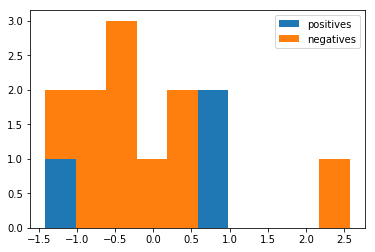

In [30]:
#Urea
positives = std_df_positive['Urea']
negatives = std_df_negative['Urea']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

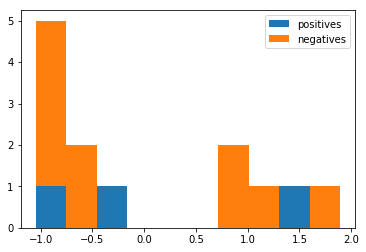

In [29]:
#Potassium
positives = std_df_positive['Potassium']
negatives = std_df_negative['Potassium']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

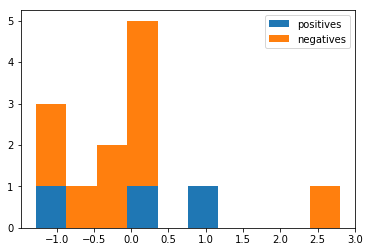

In [28]:
#Sodium
positives = std_df_positive['Sodium']
negatives = std_df_negative['Sodium']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

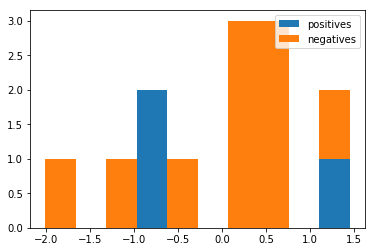

In [27]:
#Magnesium
positives = std_df_positive['Magnesium']
negatives = std_df_negative['Magnesium']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

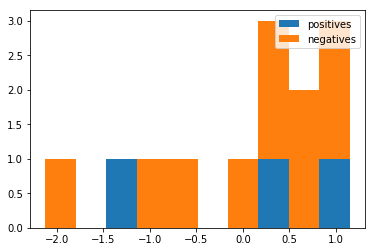

In [26]:
#Hb saturation (venous blood gas analysis
positives = std_df_positive['Hb saturation (venous blood gas analysis)']
negatives = std_df_negative['Hb saturation (venous blood gas analysis)']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

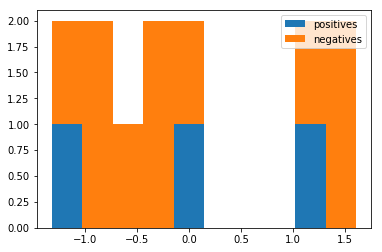

In [25]:
#pH (venous blood gas analysis)
positives = std_df_positive['pH (venous blood gas analysis)']
negatives = std_df_negative['pH (venous blood gas analysis)']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

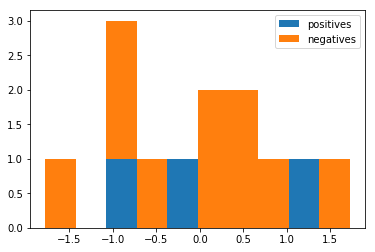

In [24]:
#pO2 (venous blood gas analysis)
positives = std_df_positive['pO2 (venous blood gas analysis)']
negatives = std_df_negative['pO2 (venous blood gas analysis)']

plt.hist([positives, negatives], label=['positives', 'negatives'], stacked=True)
plt.legend(loc='upper right')
plt.show()

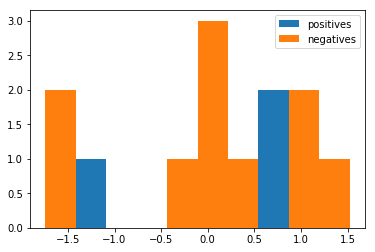

In [23]:
#pCO2 (venous blood gas analysis)
positives = std_df_positive['pCO2 (venous blood gas analysis)']
negatives = std_df_negative['pCO2 (venous blood gas analysis)']

plt.hist([positives, negatives], label=['positives', 'negatives'], stacked=True)
plt.legend(loc='upper right')
plt.show()